In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Dropout, Embedding
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv('/content/train.tsv', delimiter='\t', encoding='utf-8')
test_data_df = pd.read_csv('/content/test.tsv', delimiter='\t', encoding='utf-8')
test_label_df = pd.read_csv('/content/sampleSubmission.csv')

In [ ]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
test_data_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
test_label_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [ ]:
X_train = train_df.drop('Sentiment', axis=1)
y_train = train_df['Sentiment']
X_test = test_data_df
y_test = test_label_df['Sentiment']

In [ ]:
X_test.shape

(66292, 3)

In [ ]:
import re
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_data(data):
  review = re.sub('[^a-zA-Z]', ' ', data['Phrase'])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  return review

In [ ]:
train_corpus = []
for i in range(0, len(X_train)):
  train_corpus.append(clean_data(X_train.iloc[i,:]))

In [ ]:
test_corpus = []
for i in range(0, len(X_test)):
  test_corpus.append(clean_data(X_test.iloc[i,:]))

In [ ]:
vocab_size = 20000

In [ ]:
from pandas import DataFrame
train_data = DataFrame(train_corpus, columns=['Review'])
test_data = DataFrame(test_corpus, columns=['Review'])

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, split=' ')
tokenizer.fit_on_texts(train_data['Review'])
tokenizer.fit_on_texts(test_data['Review'])

In [ ]:
X_train = tokenizer.texts_to_sequences(train_data['Review'].values)
X_train = pad_sequences(X_train, maxlen=30)

In [ ]:
X_test = tokenizer.texts_to_sequences(test_data['Review'].values)
X_test = pad_sequences(X_test, maxlen=30)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
y_test.shape

(66292,)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)  

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

Using TensorFlow backend.


In [ ]:
y_test.shape

(66292, 5)

In [ ]:
# Checking the shape of the data before training the model
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (156060, 30, 1)
Shape of y_train : (156060, 5)
Shape of X_test : (66292, 30, 1)
Shape of y_test : (66292, 5)


In [ ]:
# CNN & Embedding layer configuration
embedding_dim = 100
num_filters = 8
filter_size = 3
pool_size = 1
input_shape = (X_train.shape[1],1)
input_length = X_train.shape[1]


In [ ]:
## CNN Model without Embedding Layer
model = Sequential([
  Conv1D(num_filters, filter_size, input_shape=input_shape),
  MaxPool1D(pool_size=pool_size),
  Flatten(),
  Dense(5, activation='softmax'),
])
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 8)             32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 28, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 224)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1125      
Total params: 1,157
Trainable params: 1,157
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
4877/4877 [==============================] - 22s 5ms/step - loss: 18.8522 - accuracy: 0.4172 - val_loss: 10.1696 - val_accuracy: 0.7600
Epoch 2/10
4877/4877 [==============================] - 21s 4ms/step - loss: 8.4497 - accuracy: 0.4295 - val_loss: 4.7906 - val_accuracy: 0.5705
Epoch 3/10
4877/4877 [==============================] - 21s 4ms/step - loss: 4.0023 - accuracy: 0.4500 - val_loss: 1.9107 - val_accuracy: 0.6354
Epoch 4/10
4877/4877 [==============================] - 21s 4ms/step - loss: 1.8459 - accuracy: 0.4772 - val_loss: 0.8146 - val_accuracy: 0.8751
Epoch 5/10
4877/4877 [==============================] - 21s 4ms/step - loss: 1.3454 - accuracy: 0.5001 - val_loss: 0.6738 - val_accuracy: 0.9552
Epoch 6/10
4877/4877 [==============================] - 21s 4ms/step - loss: 1.3274 - accuracy: 0.5026 - val_loss: 0.7609 - val_accuracy: 0.8999
Epoch 7/10
4877/4877 [==============================] - 21s 4ms/step - loss: 1.3230 - accuracy: 0.5021 - val_loss: 1.0764 - val_

In [ ]:
# Loss And Accuracy values - Without Embedding Layer
loss,acc = model.evaluate(X_test, y_test)
print('Test accuracy without Embedding Layer: ', acc)
print('Test Loss without Embedding Layer: ', loss)

2072/2072 [==============================] - 6s 3ms/step - loss: 0.6901 - accuracy: 0.8919
Test accuracy without Embedding Layer:  0.8919175863265991
Test Loss without Embedding Layer:  0.6900688409805298


In [ ]:
# Adding Embedding layer to Model
model1 = Sequential([
  Embedding(vocab_size, embedding_dim, input_length=input_length),
  Conv1D(num_filters, filter_size, input_shape=input_shape),
  MaxPool1D(pool_size=pool_size),
  Flatten(),
  Dense(5, activation='softmax'),
])
model1.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 8)             2408      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 28, 8)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1125      
Total params: 2,003,533
Trainable params: 2,003,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.9644 - accuracy: 0.6115 - val_loss: 0.9183 - val_accuracy: 0.6801
Epoch 2/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.7937 - accuracy: 0.6782 - val_loss: 1.0105 - val_accuracy: 0.6404
Epoch 3/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.7314 - accuracy: 0.7016 - val_loss: 1.0271 - val_accuracy: 0.6414
Epoch 4/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.6936 - accuracy: 0.7155 - val_loss: 1.1366 - val_accuracy: 0.6176
Epoch 5/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.6663 - accuracy: 0.7253 - val_loss: 0.9954 - val_accuracy: 0.6615
Epoch 6/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.6462 - accuracy: 0.7334 - val_loss: 1.1016 - val_accuracy: 0.6325
Epoch 7/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.6308 - accuracy: 0.7390 - val_loss: 1.0133 -

In [ ]:
# Loss And Accuracy values - with Embedding Layer
loss1,acc1 = model1.evaluate(X_test, y_test)
print('Test accuracy after adding Embedding Layer: ', acc1)
print('Test Loss after adding Embedding Layer: ', loss1)

2072/2072 [==============================] - 7s 3ms/step - loss: 1.0935 - accuracy: 0.6531
Test accuracy after adding Embedding Layer:  0.6531255841255188
Test Loss after adding Embedding Layer:  1.0934909582138062


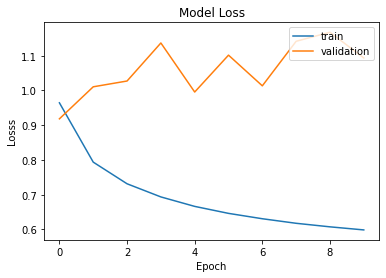

In [ ]:
# Loss Plot - after adding Embedding Layer
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Losss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Adding DropOut layer to Model

model2 = Sequential([
  Embedding(vocab_size, embedding_dim, input_length= input_length),
  Conv1D(num_filters, filter_size, input_shape=input_shape),
  Dropout(0.5),
  MaxPool1D(pool_size=pool_size),
  Dropout(0.5),
  Flatten(),
  Dense(5, activation='softmax'),
])
model2.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 8)             2408      
_________________________________________________________________
dropout (Dropout)            (None, 28, 8)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 28, 8)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 8)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [ ]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
4877/4877 [==============================] - 98s 20ms/step - loss: 1.1023 - accuracy: 0.5649 - val_loss: 0.9106 - val_accuracy: 0.7024
Epoch 2/10
4877/4877 [==============================] - 97s 20ms/step - loss: 0.9663 - accuracy: 0.6133 - val_loss: 0.8725 - val_accuracy: 0.7064
Epoch 3/10
4877/4877 [==============================] - 98s 20ms/step - loss: 0.9340 - accuracy: 0.6262 - val_loss: 0.8884 - val_accuracy: 0.7015
Epoch 4/10
4877/4877 [==============================] - 98s 20ms/step - loss: 0.9178 - accuracy: 0.6316 - val_loss: 0.9148 - val_accuracy: 0.6945
Epoch 5/10
4877/4877 [==============================] - 97s 20ms/step - loss: 0.9038 - accuracy: 0.6372 - val_loss: 0.8828 - val_accuracy: 0.7076
Epoch 6/10
4877/4877 [==============================] - 98s 20ms/step - loss: 0.8963 - accuracy: 0.6409 - val_loss: 0.9045 - val_accuracy: 0.6982
Epoch 7/10
4877/4877 [==============================] - 99s 20ms/step - loss: 0.8890 - accuracy: 0.6424 - val_loss: 0.9213 -

In [ ]:
# Loss And Accuracy values - Adding Dropout Layer
loss2,acc2 = model2.evaluate(X_test, y_test)
print('Test accuracy after adding Dropout Layer: ', acc2)
print('Test Loss after adding Dropout Layer: ', loss2)

2072/2072 [==============================] - 7s 3ms/step - loss: 0.8892 - accuracy: 0.7091
Test accuracy after adding Dropout Layer:  0.7091202735900879
Test Loss after adding Dropout Layer:  0.88917076587677


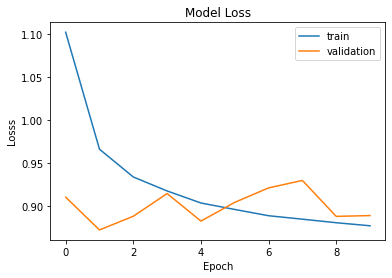

In [ ]:
# Loss Plot - after adding Dropout Layer
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Losss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()